#`CS595 - Termination Project - Twitter Sentiment Analysis`

---



---



In [50]:
import numpy as np
import pandas as pd

In [51]:
# data = pd.read_csv('Sentiment.csv')
data = pd.read_csv('twitter_training.csv')

In [52]:
len(data)

74682

In [53]:
data.head()

,ID,Borderlands,Sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [55]:
data.isnull().sum()

ID               0
Borderlands      0
Sentiment        0
text           686
dtype: int64

In [56]:
import seaborn as sns

<ipython-input-57-a496859e710b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, fmt = '.2f')


<Axes: >

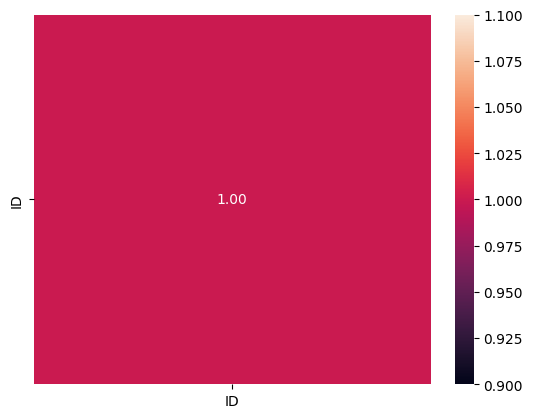

In [57]:
sns.heatmap(data.corr(), annot = True, fmt = '.2f')

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [59]:
data['text'] = data['text'].astype(str)
text = ''.join(data['text'])

In [60]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

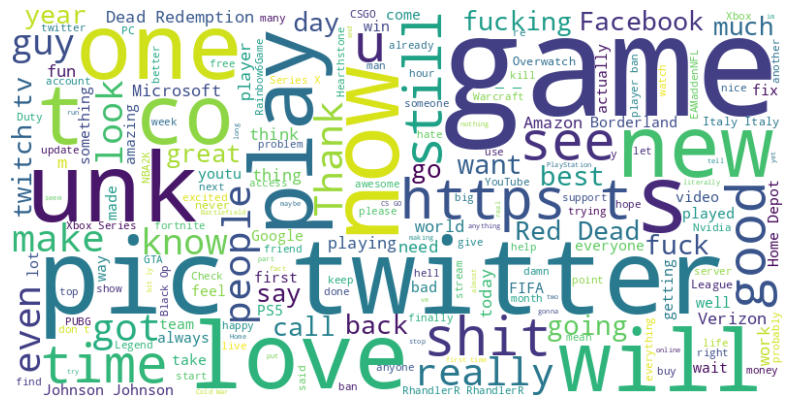

In [61]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
